# Compare the structure of the a3 model to that of our Python model

250314 - This is an updated version where ksl has done a better job at understanding how to interpret the Hillier abundance files

In [1]:
import os
os.getcwd()

'/media/ssd4/Projects/release-models/Details/cmfgen/plots'

In [2]:
from astropy.io import ascii
import matplotlib.pyplot as plt
from astropy.table import hstack,join
import numpy as np

In [3]:
# cmf=ascii.read('a1_structure.txt')
cmf=ascii.read('../cmfgen/a3_structure.txt')
xdir='../python/Results/'

root=xdir+'a3'
root=xdir+'a3_hhe'
root=xdir+'a3_cno'
python=ascii.read(root+'.master.txt')

In [4]:
cmf.info()

<Table length=52>
name  dtype 
---- -------
   r float64
   v float64
   T float64
  ne float64
  nh float64


In [5]:
python.info()

<Table length=30>
  name    dtype 
-------- -------
       r float64
    rcen float64
       i   int64
  inwind   int64
converge   int64
     v_x float64
     v_y float64
     v_z float64
     vol float64
     rho float64
      ne float64
     t_e float64
     t_r float64
      h1 float64
     he2 float64
      c4 float64
      n5 float64
      o6 float64
dmo_dt_x float64
dmo_dt_y float64
dmo_dt_z float64
      ip float64
      xi float64
    ntot float64
    nrad float64
  nioniz float64


In [6]:
v=python['v_x']*python['v_x']+python['v_y']*python['v_y']+python['v_z']*python['v_z']
v=np.sqrt(v)
python['v']=v

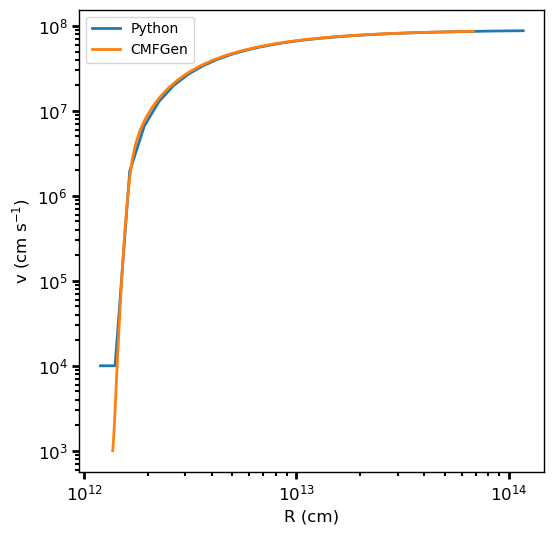

In [7]:
plt.figure(1,(6,6))
plt.loglog(python['r'],python['v'],label='Python')
plt.loglog(cmf['r'],cmf['v'],label='CMFGen')
plt.legend(loc='best')
plt.xlabel('R (cm)')
plt.ylabel(r'v (cm s$^{-1}$)')
plt.savefig(root+'_compare_vel.png')

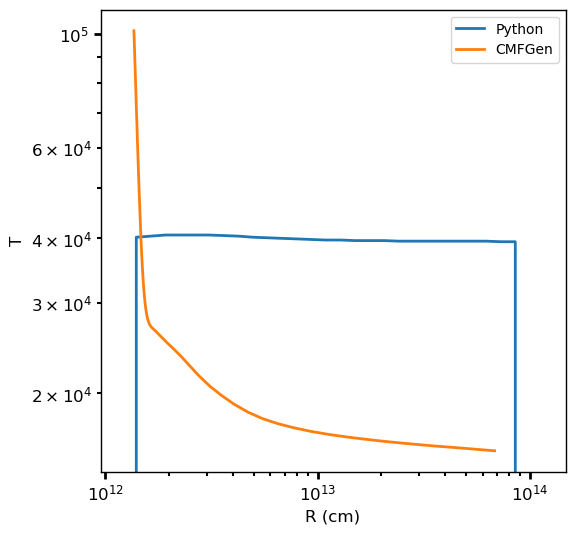

In [8]:
plt.figure(1,(6,6))
plt.loglog(python['r'],python['t_r'],label='Python')
plt.loglog(cmf['r'],cmf['T'],label='CMFGen')
plt.xlabel('R (cm)')
plt.ylabel(r'T')
plt.legend(loc='best')
plt.savefig(root+'.compare_Tr.png')

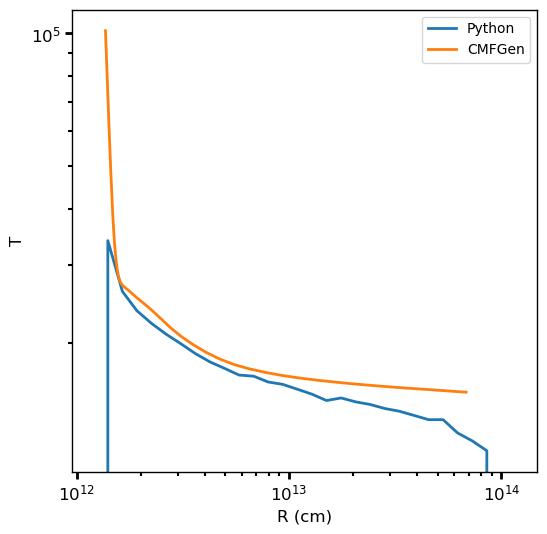

In [9]:
plt.figure(1,(6,6))
plt.loglog(python['r'],python['t_e'],label='Python')
plt.loglog(cmf['r'],cmf['T'],label='CMFGen')
plt.xlabel('R (cm)')
plt.ylabel(r'T')
plt.legend(loc='best')
plt.savefig(root+'.compare_Te.png')

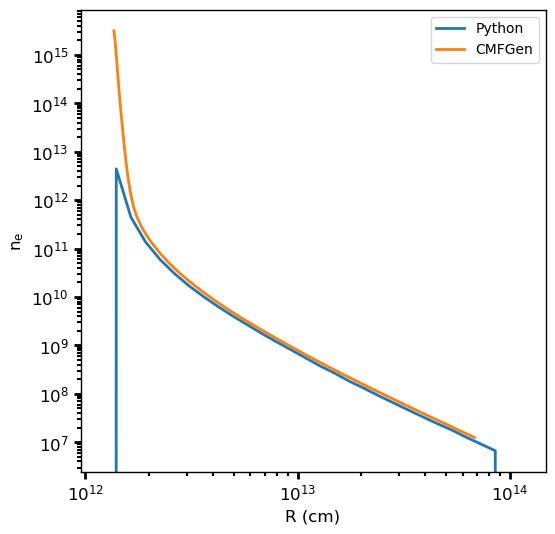

In [10]:
plt.figure(1,(6,6))
plt.loglog(python['r'],python['ne'],label='Python')
plt.loglog(cmf['r'],cmf['ne'],label='CMFGen')
plt.xlabel('R (cm)')
plt.ylabel(r'n$_e$')
plt.legend(loc='best')
plt.savefig(root+'.compare_ne.png')

<Table length=30>
 name   dtype 
------ -------
     r float64
     i   int64
inwind   int64
   i01 float64
   i02 float64
   i03 float64
   i04 float64
   i05 float64
   i06 float64
   i07 float64
['n', 'r', 'CARB', 'CIII', 'CIV', 'CV']
Ready or not


/tmp/ipykernel_168869/2995451871.py:53: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  plt.ylim(-0.1,1.1)


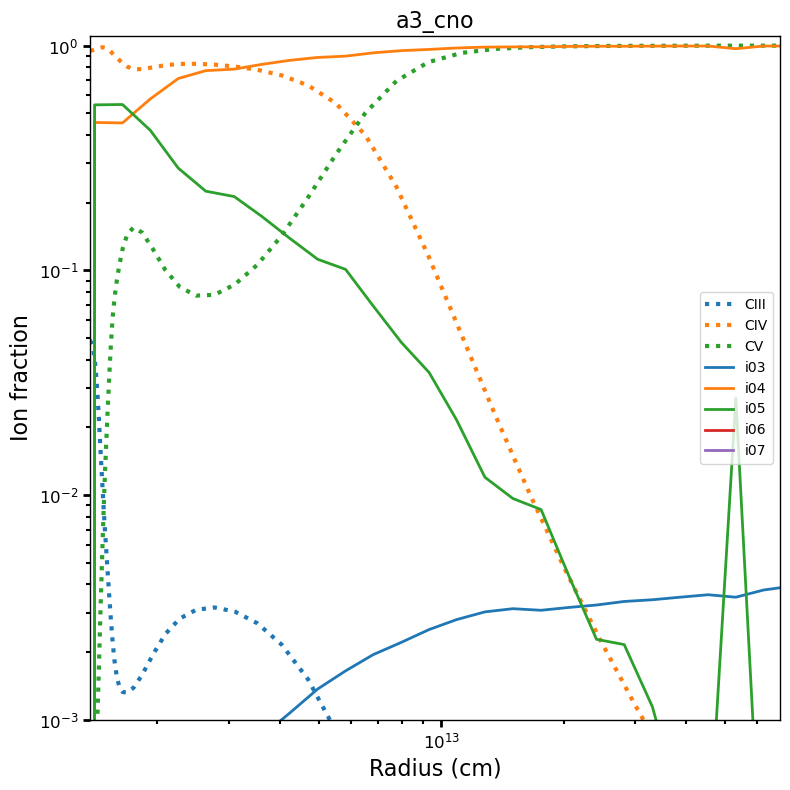

In [33]:

def compare_ion(ion='C',cmfgen_root='../cmfgen/a3', python_root='../python/py88a_240515/a3_hhe'):
    if ion=='C':
        xpy='C'
        xcmfgen='CARB'
        istart=5
    elif ion=='He':
        xpy='He'
        xcmfgen='HE'
        istart=3
        

    pyfile='%s.%s.frac.txt' % (python_root,xpy)
    cmf_file='%s.%s.txt'% (cmfgen_root,xcmfgen)


    try:
        py_ion=ascii.read(pyfile)
    except:
        print('Error: Could not open ', pyfile)
        return

    py_ion.info()

    try:
        cmf_ion=ascii.read(cmf_file)
        
    except:
        print('Error: could not open ',cmf_file)
        return

    cmf_colnames=cmf_ion.colnames
    print(cmf_colnames)

    print('Ready or not')
    i=3
    plt.figure(1,(8,8))
    while i<len(cmf_colnames):
        plt.loglog(cmf['r'],cmf_ion[cmf_colnames[i]]/cmf_ion[cmf_colnames[2]],':',linewidth=3,label=cmf_colnames[i])
        i+=1
    plt.gca().set_prop_cycle(None)
    j=istart
    py_colnames=py_ion.colnames
    while j<len(py_colnames):
        plt.loglog(py_ion['r'],py_ion[py_colnames[j]],label=py_colnames[j])
        j+=1

    xtitle=python_root.split('/')[-1]
    plt.title(xtitle,size=16)
    


    plt.legend()
    plt.ylim(-0.1,1.1)
    plt.ylim(0.001,1.1)
    plt.xlim(np.min(cmf['r']),np.max(cmf['r']))
    plt.xlabel('Radius (cm)',size=16)
    plt.ylabel('Ion fraction',size=16)
    plt.tight_layout()
    plt.savefig('%s.%s.png' % (xtitle,ion))
    return

compare_ion(python_root=root)

<Table length=30>
 name   dtype 
------ -------
     r float64
     i   int64
inwind   int64
   i01 float64
   i02 float64
   i03 float64
   i04 float64
   i05 float64
   i06 float64
   i07 float64
['n', 'r', 'CARB', 'CIII', 'CIV', 'CV']
Ready or not


/tmp/ipykernel_168869/2995451871.py:53: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  plt.ylim(-0.1,1.1)


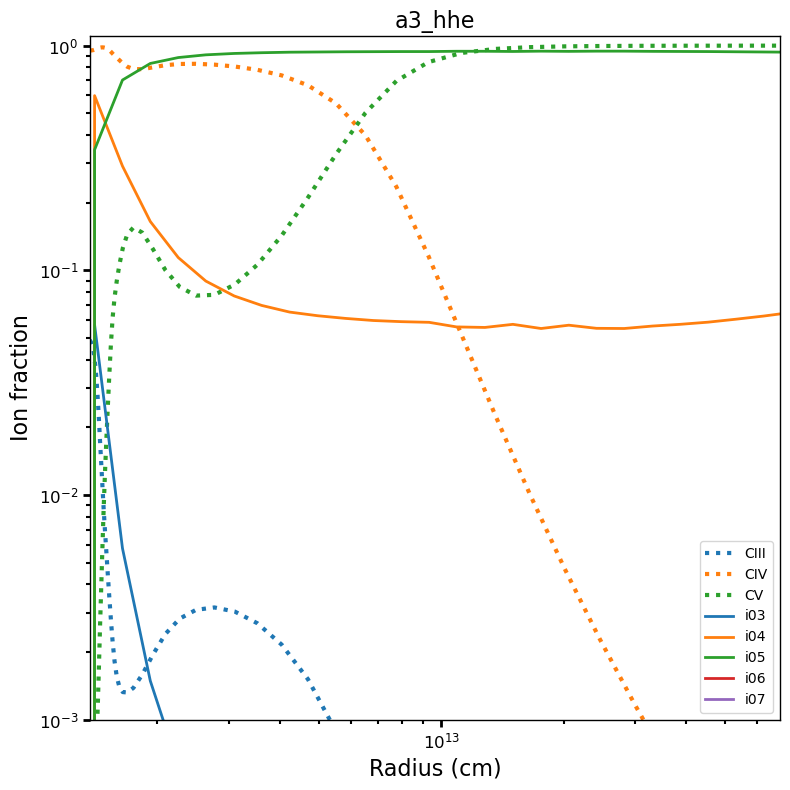

In [34]:
root=xdir+'a3_hhe'
compare_ion(python_root=root)

<Table length=30>
 name   dtype 
------ -------
     r float64
     i   int64
inwind   int64
   i01 float64
   i02 float64
   i03 float64
   i04 float64
   i05 float64
   i06 float64
   i07 float64
['n', 'r', 'CARB', 'CIII', 'CIV', 'CV']
Ready or not


/tmp/ipykernel_168869/2995451871.py:53: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  plt.ylim(-0.1,1.1)


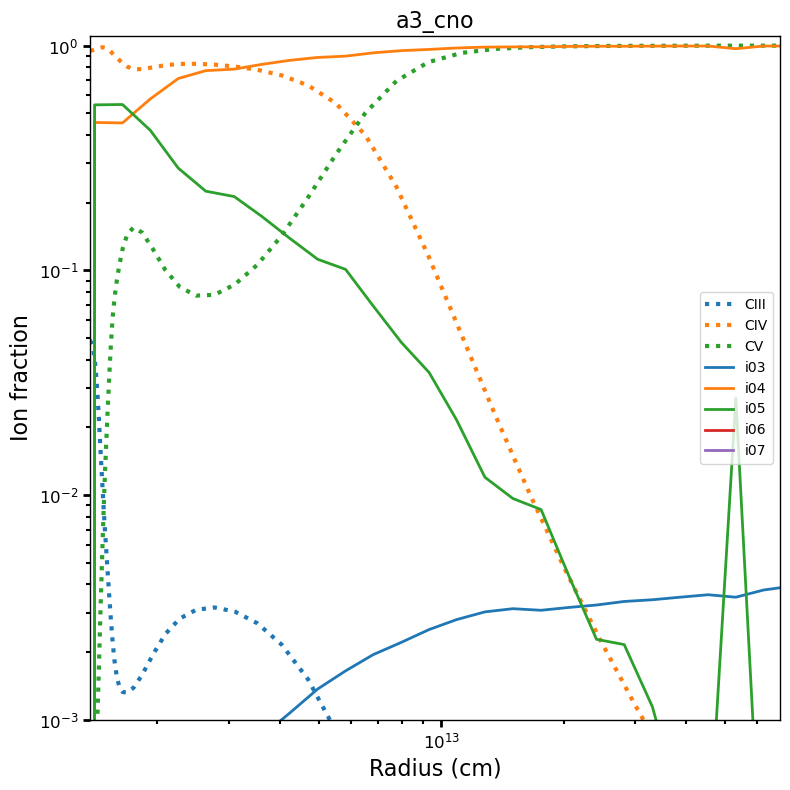

In [35]:
root=xdir+'a3_cno'
compare_ion(python_root=root)

<Table length=30>
 name   dtype 
------ -------
     r float64
     i   int64
inwind   int64
   i01 float64
   i02 float64
   i03 float64
['n', 'r', 'HE', 'HeI', 'HeII', 'HeIII']
Ready or not


/tmp/ipykernel_168869/2995451871.py:53: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  plt.ylim(-0.1,1.1)


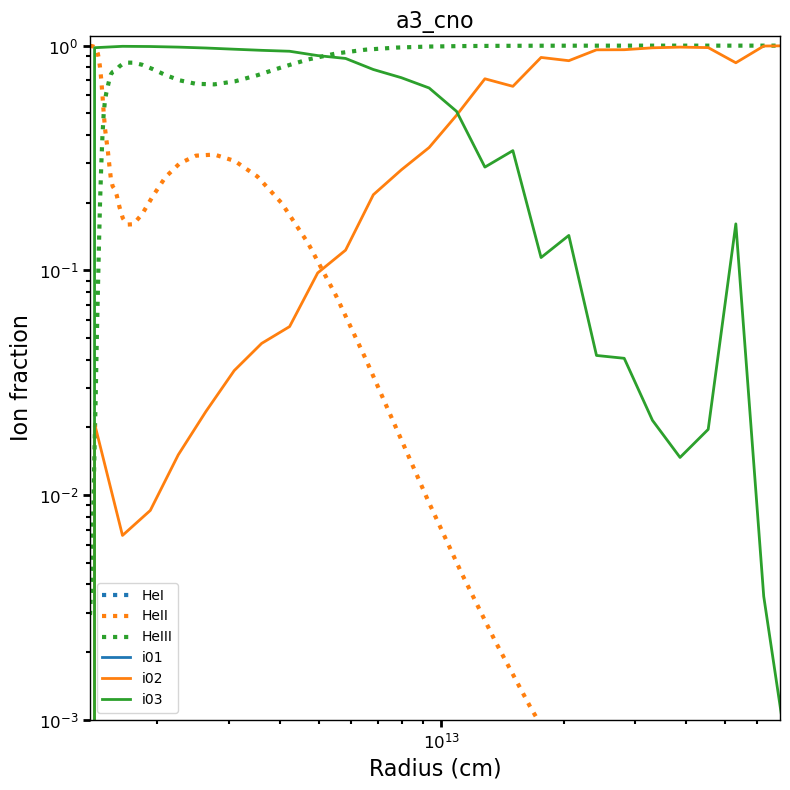

In [37]:
root=xdir+'a3_cno'
compare_ion(ion='He',python_root=root)